<a href="https://colab.research.google.com/github/Katie33333/linkedIn-network/blob/main/linkedin_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize LinkedIn connection data using graph Python libraries
I'm using the code and example created by Benedict Neo found [here](https://medium.com/bitgrit-data-science-publication/visualize-your-linkedin-network-with-python-59a213786c4#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjAzMmIyZWYzZDJjMjgwNjE1N2Y4YTliOWY0ZWY3Nzk4MzRmODVhZGEiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2MzY5MzQzNjksImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwMTY2MzM1MDc0MTA3NTM3MTg5MCIsImVtYWlsIjoia2F0aWUxMjE0NzhAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiJLYXRpZSBLaXJrcGF0cmljayIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS0vQU9oMTRHZ0RJczNybWs2N0FKT3BkYTJrR19kc0owMG9kN08xX2ZYSkVHQXhlQT1zOTYtYyIsImdpdmVuX25hbWUiOiJLYXRpZSIsImZhbWlseV9uYW1lIjoiS2lya3BhdHJpY2siLCJpYXQiOjE2MzY5MzQ2NjksImV4cCI6MTYzNjkzODI2OSwianRpIjoiMzEwMWYwYzY3YjkwZjIxZDExMmVlOWU4N2ZjZjUwNmEzMjk0NDM1MyJ9.0mf2x7ZV6tGZpaUhezPEnl0FiaG945KwLo5TPKglLQ-CA6JYbv4fqwBnzNe8MQ7U5Yw_Qo4UrArmdBwxbkKz5bS8un5_LBh6LrEqayPMDmWoyzp5WgV8yyxTCnL3aWxCXWyOJJ9LBRhCvVJBNtgYXaP2Bm1igMYzD8z0TO4s9ZKs73ujf6YGpiOZ8g1t6IplycXd2z-LzZY0TCYYuhHYrUg4krgxj6KI9xUyJ30zd21dsgXd_6YP3mHT18ERZvh2vzp4CkJOD1CQGdbB9_8GZqb9_NaHlCRVO2RFdk0dTEXrJ5FvKppwRr0T7OAY1Kjb5PC4n_Mg8L-ejn8EjtUZlg)

In [15]:
!pip install pyjanitor pyvis --quiet

In [3]:
import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

In [7]:
df_ori = pd.read_csv("/content/drive/MyDrive/linkedin_network.csv", skiprows=3)

In [8]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     612 non-null    object
 1   Last Name      612 non-null    object
 2   Email Address  19 non-null     object
 3   Company        604 non-null    object
 4   Position       604 non-null    object
 5   Connected On   626 non-null    object
dtypes: object(6)
memory usage: 29.5+ KB


# Data Cleaning

In [9]:
df = (
    df_ori
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%d %b %Y')
  )
df.head()

,company,position,connected_on
2,State Farm ®,Senior Data Scientist and Team Lead,2021-10-21
3,Run:AI,Account Development Representative,2021-10-20
4,Fiddler,"ML Ops, Monitoring and Responsible AI",2021-10-20
5,Deloitte Consulting,Consultant,2021-10-17
6,State Farm ®,Technology Manager,2021-10-08


## Simple EDA

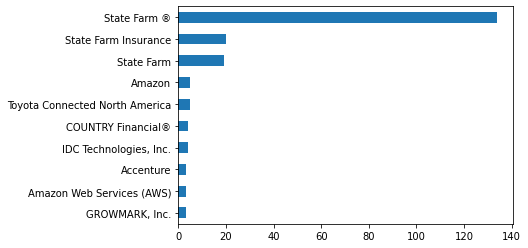

In [10]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

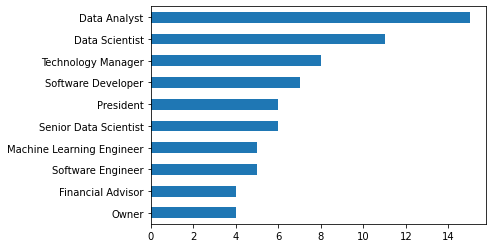

In [11]:
df['position'].value_counts().head(10).plot(kind="barh").invert_yaxis();

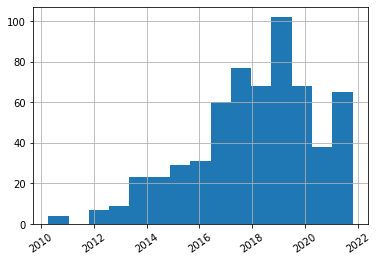

In [12]:
df['connected_on'].hist(xrot=35, bins=15);

# Aggregate sum of connections by company

In [13]:
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(10)

,company,count
0,State Farm ®,134
1,State Farm Insurance,20
2,State Farm,19
3,Amazon,5
4,Toyota Connected North America,5
5,COUNTRY Financial®,4
6,"IDC Technologies, Inc.",4
12,TEKsystems,3
16,Google,3
14,Zions Bancorporation,3


# Aggregate sum of connections by position

In [14]:
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(10)

,position,count
0,Data Analyst,15
1,Data Scientist,11
2,Technology Manager,8
3,Software Developer,7
4,President,6
5,Senior Data Scientist,6
6,Machine Learning Engineer,5
7,Software Engineer,5
14,Insurance Agent,4
20,Principal Data Scientist,4


# Creating the network

## Example network

In [16]:
nt = net.Network(notebook=True)

g = nx.Graph()
g.add_node(0, label = "root") # intialize yourself as central node
g.add_node(1, label = "Company 1", size=10, title="info1")
g.add_node(2, label = "Company 2", size=40, title="info2")
g.add_node(3, label = "Company 3", size=60, title="info3")
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)

nt.from_nx(g)
nt.show('nodes.html')
display(HTML('nodes.html'))

In [17]:
print(f"number of nodes: {g.number_of_nodes()}")
print(f"number of edges: {g.number_of_edges()}")

number of nodes: 4
number of edges: 3


In [18]:
for _, row in df_company.head(5).iterrows():
  print(row['company'] + "-" + str(row['count']))

State Farm ®-134
State Farm Insurance-20
State Farm-19
Amazon-5
Toyota Connected North America-5


In [19]:
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)

(372, 2)
(5, 2)


In [20]:
print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=5]
print(df_position_reduced.shape)

(473, 2)
(8, 2)


In [21]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_company_reduced.iterrows():

  # store company name and count
  company = row['company']
  count = row['count']

  title = f"<b>{company}</b> – {count}"
  positions = set([x for x in df[company == df['company']]['position']])
  positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  position_list = f"<ul>{positions}</ul>"
  hover_info = title + position_list

  g.add_node(company, size=count*2, title=hover_info, color='#3449eb')
  g.add_edge('root', company, color='grey')

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('company_graph.html')
display(HTML('company_graph.html'))

In [22]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_position_reduced.iterrows():

  count = f"{row['count']}"
  position= row['position']
  
  g.add_node(position, size=count, color='#3449eb', title=count)
  g.add_edge('root', position, color='grey')

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('position_graph.html')
display(HTML('position_graph.html'))